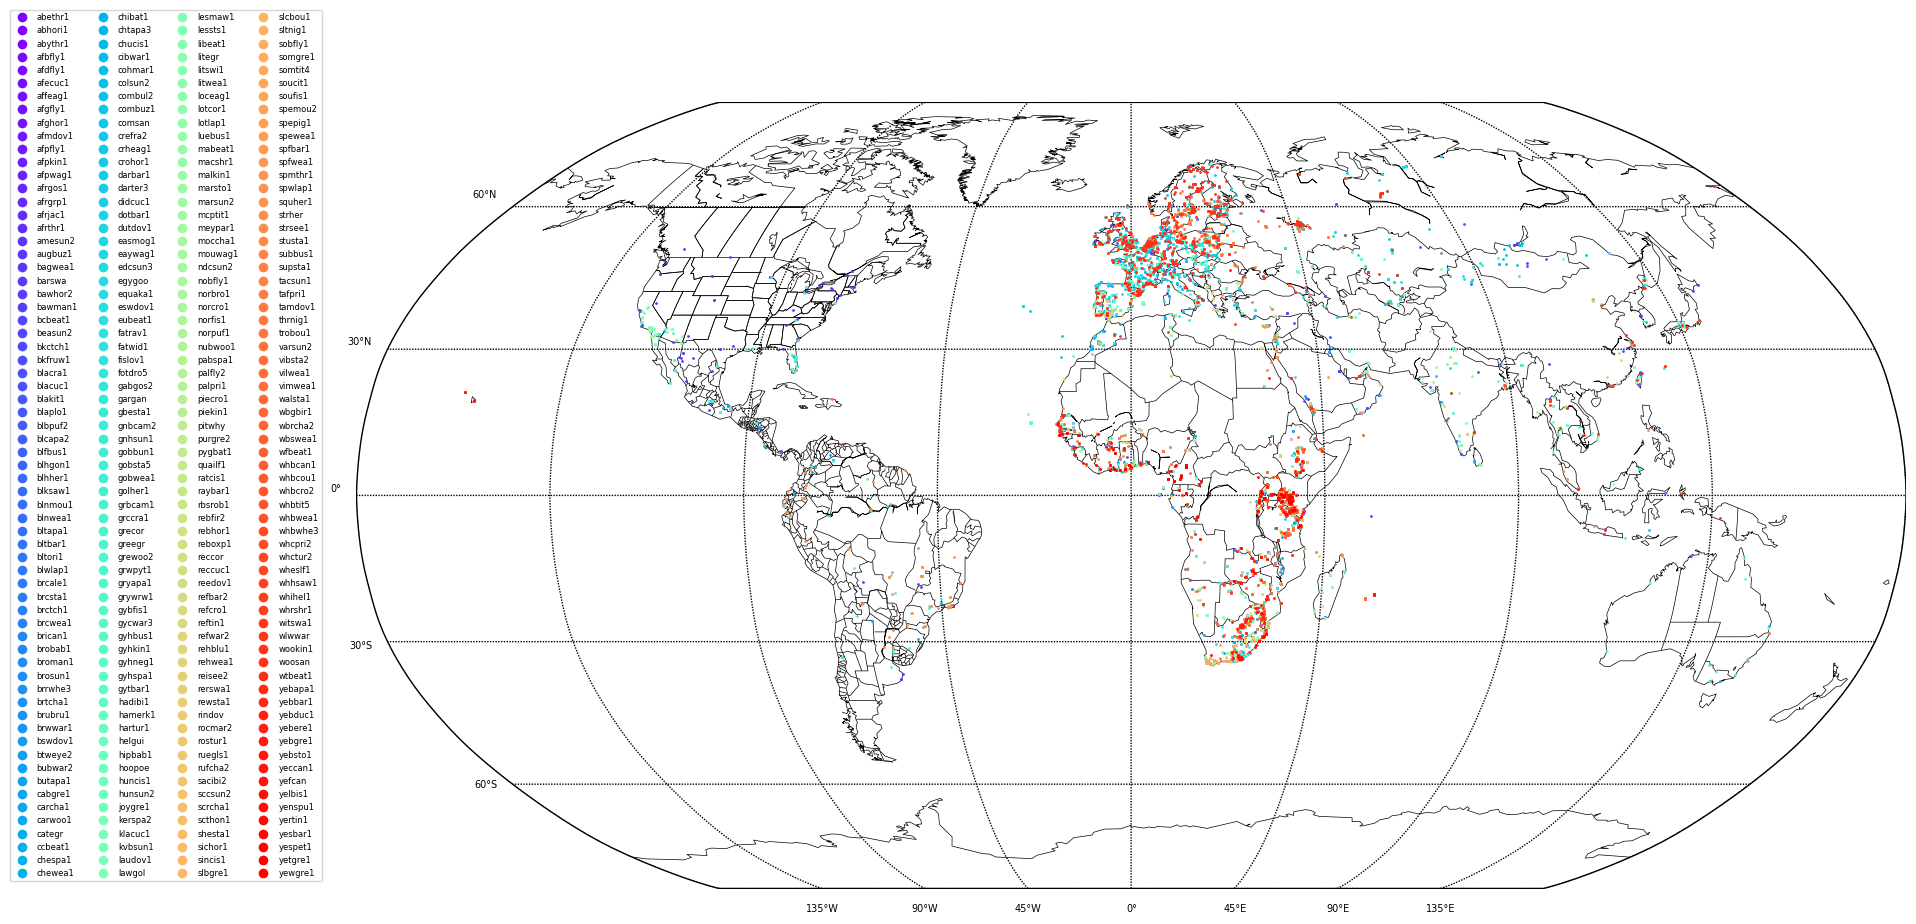

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import random
from matplotlib.lines import Line2D

csv_data = pd.read_csv('train_metadata.csv')
tag_names = np.unique(csv_data['primary_label'])

colors = plt.cm.rainbow(np.linspace(0, 1, len(tag_names)))
color_dict = {}
for i, name in enumerate(tag_names):
    color_dict[name] = colors[i]  # '#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])


fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0], fontsize=7)
m.drawmeridians(range(-180, 181, 45), labels=[0, 0, 0, 1], fontsize=7)


for i, class_name in enumerate(csv_data['primary_label']):

    x, y = m(csv_data['longitude'][i], csv_data['latitude'][i])
    m.plot(x, y, 'o', markersize=1, color=color_dict[class_name],label=class_name)


legend_elements = [ Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[name], markersize=8, label=name) for  name in tag_names]

# 创建图例
# fig, ax = plt.subplots()
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=6, bbox_to_anchor=(0.03, 0.3))  # 设置图例显示为4列

# 隐藏坐标轴
# fig.axis('off')

# 显示图例
plt.show()


